<a href="https://colab.research.google.com/github/MaxVieiraSantiago/Machine-Learning-Algorithms/blob/master/Logistic%20Regression/Regress%C3%A3o_Log%C3%ADstica_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = 'https://raw.githubusercontent.com/MaxVieiraSantiago/Machine-Learning-Algorithms/master/Dataset/BaseDados_RegressaoLogistica.xlsx'

dados = pd.read_excel( url )
dados.shape

(100, 5)

In [4]:
dados.describe()

,Id Cliente,Renda,Tipo Renda,Possui Imóvel,Comprou?
count,100.000000,100.00000,100.000000,100.00000,100.000000
mean,50.500000,8520.77000,1.400000,1.85000,0.640000
std,29.011492,4039.01965,0.710669,0.35887,0.482418
min,1.000000,1643.00000,1.000000,1.00000,0.000000
25%,25.750000,5455.25000,1.000000,2.00000,0.000000
50%,50.500000,8824.00000,1.000000,2.00000,1.000000
75%,75.250000,12036.00000,2.000000,2.00000,1.000000
max,100.000000,14994.00000,3.000000,2.00000,1.000000


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id Cliente     100 non-null    int64
 1   Renda          100 non-null    int64
 2   Tipo Renda     100 non-null    int64
 3   Possui Imóvel  100 non-null    int64
 4   Comprou?       100 non-null    int64
dtypes: int64(5)
memory usage: 4.0 KB


In [6]:
dados.head()

,Id Cliente,Renda,Tipo Renda,Possui Imóvel,Comprou?
0,1,10480,1,2,1
1,2,6182,2,2,1
2,3,6387,3,1,0
3,4,6528,1,2,0
4,5,8269,1,2,0


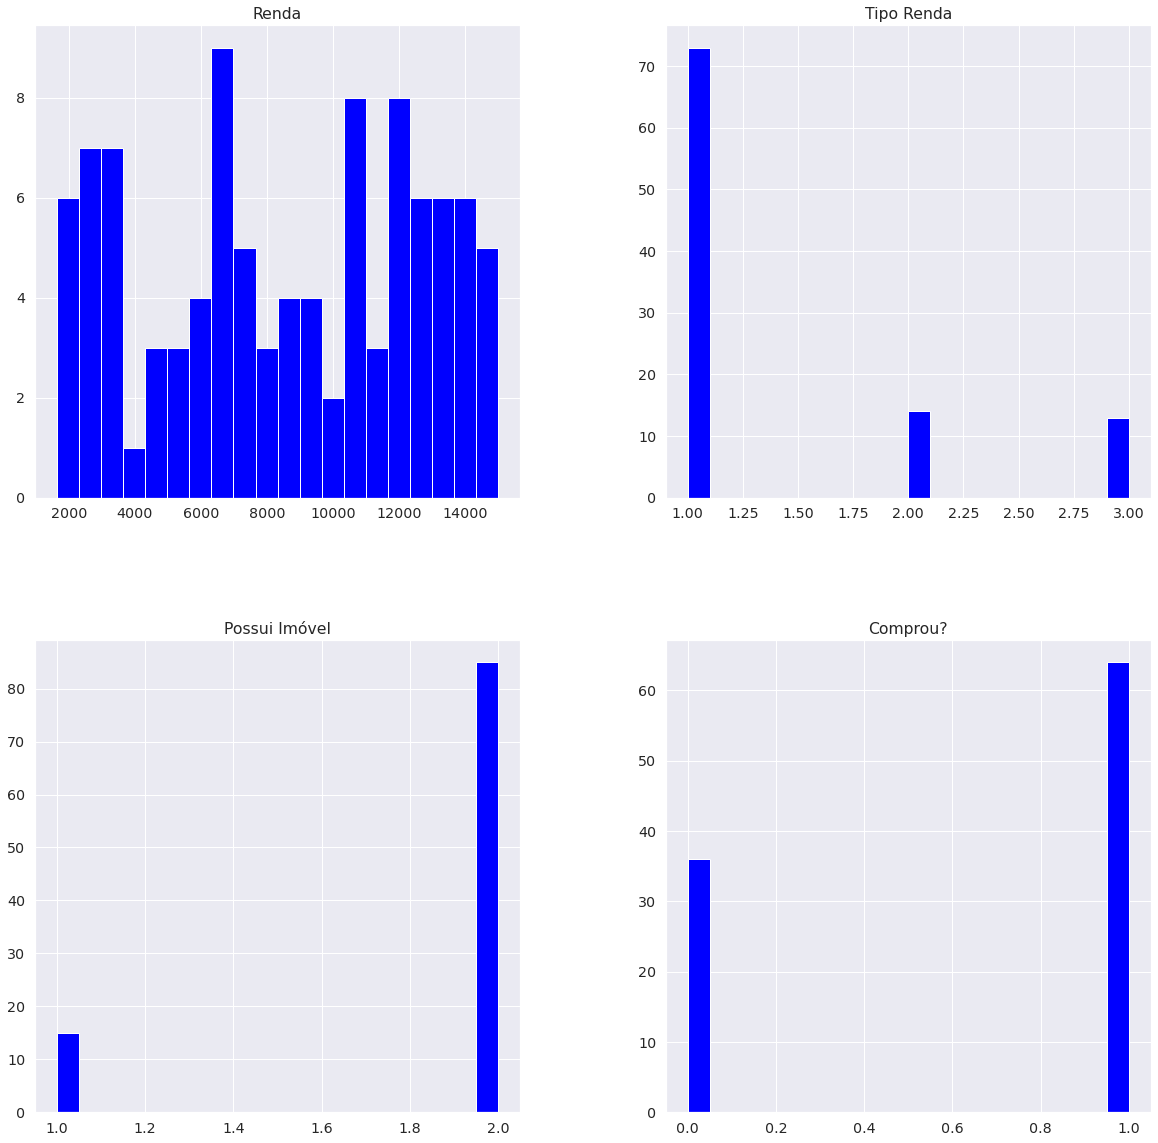

In [10]:
sns.set( font_scale = 1.3, rc={ 'figure.figsize' : (20,20) } )
eixo = dados.drop( 'Id Cliente', axis=1 ).hist( bins=20, color = 'blue' )

# Tipo Renda ( 1 = Assalariado, 2 = Autônoma, 3 = Empresário )

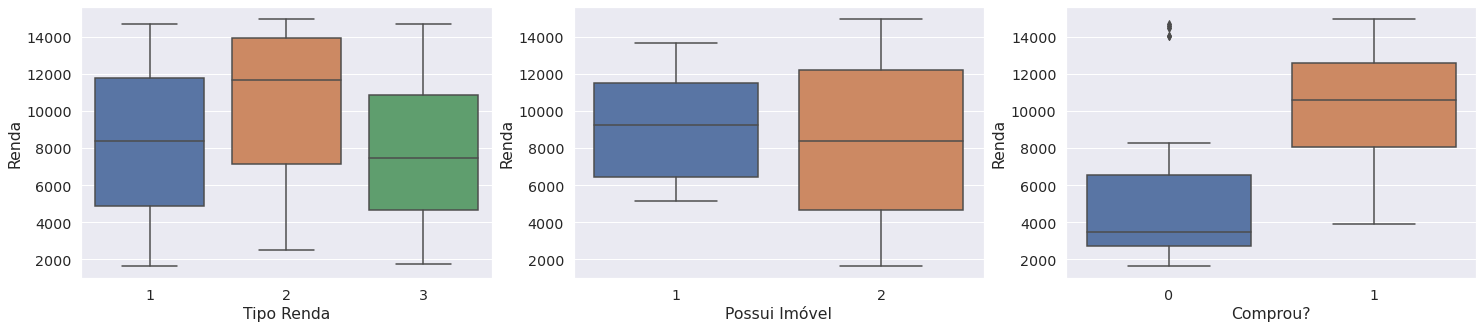

In [19]:
plt.figure( figsize=(25,5) )
plt.subplot( 1, 3, 1 )
sns.boxplot( data = dados, x = 'Tipo Renda', y = 'Renda' );
plt.subplot( 1, 3, 2 )
sns.boxplot( data = dados, x = 'Possui Imóvel', y = 'Renda' );
plt.subplot( 1, 3, 3 )
sns.boxplot( data = dados, x = 'Comprou?', y = 'Renda' );


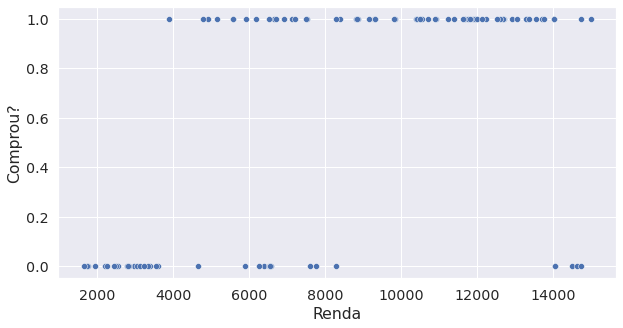

In [22]:
plt.figure( figsize=(10,5) )
sns.scatterplot( data = dados, x = 'Renda', y = 'Comprou?');

In [23]:
dados.head()

,Id Cliente,Renda,Tipo Renda,Possui Imóvel,Comprou?
0,1,10480,1,2,1
1,2,6182,2,2,1
2,3,6387,3,1,0
3,4,6528,1,2,0
4,5,8269,1,2,0


In [27]:
X = dados.iloc[ : , 1:4 ].values
y = dados.iloc[ :, 4 ].values

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_teste, y_train, y_teste = train_test_split( X, y, test_size=0.20 )

In [34]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression()
modelo.fit( X_train, y_train )

predicao = modelo.predict( X_teste )

In [35]:
# Matriz de Confusão
from sklearn.metrics import confusion_matrix

confusion_matrix( y_teste, predicao )

#        0   1
#     0
#     1

array([[ 6,  0],
       [ 4, 10]])

In [38]:
from sklearn.metrics import classification_report

print( classification_report( y_teste, predicao ) )

              precision    recall  f1-score   support

           0       0.60      1.00      0.75         6
           1       1.00      0.71      0.83        14

    accuracy                           0.80        20
   macro avg       0.80      0.86      0.79        20
weighted avg       0.88      0.80      0.81        20



# Previsões

In [39]:
dados.head()

,Id Cliente,Renda,Tipo Renda,Possui Imóvel,Comprou?
0,1,10480,1,2,1
1,2,6182,2,2,1
2,3,6387,3,1,0
3,4,6528,1,2,0
4,5,8269,1,2,0


In [67]:
# Informações do novo cliente que chegou
salario = 6000
tipo_renda = 3
possui_imovel = 1

X_parametro = [ [ salario, tipo_renda, possui_imovel ] ]

realizando_previsao = modelo.predict( X_parametro )
probabilidade       = modelo.predict_proba( X_parametro )
percentual_comprar  = probabilidade[0,1] * 100
percentual_nao      = probabilidade[0,0] * 100

if realizando_previsao == 0:
  print(f'Baseado nos parâmetros, este cliente NÃO irá comprar o imóvel com uma probabilidade de {percentual_nao:.2f}' + '%')
else:
  print(f'Baseado nos parâmetros, este cliente irá comprar o imóvel com uma probabilidade de {percentual_comprar:,.2f}' + '%' )

Baseado nos parâmetros, este cliente NÃO irá comprar o imóvel com uma probabilidade de 63.67%
